# Homework 3

In this homework you will:
* Use feature weights learned with logistic regression to assess feature importance
* Understand what happens to weights in the limit as LR runs for more iterations and how to deal with that by changing the objective function.

## Logistic Regression

Recall that logistic regression learns a weight vector such that $wx >> 0$ for positive instances and $wx << 0$ for negative instances.  Below you'll look at the weights that were learned and think about which features are important.

Remeber that the implementation of multi-class logistic regression in scikit is one-vs-all.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

### Load the data

The wine dataset has 13 features that are real valued and **all positive**.  That last bit is important for what follows.  The goal is to classify a sample of wine characterized by its 13 featues into one of three types of wines.

In [2]:
data = load_wine()
X = data['data']
y = data['target']

### Train a classifier and look at the feature weights

The plot below shows the weights associated with all 13 features for each of the three classes.  The are overlaid so that you can compare weights across classes.

/Users/oates/tmp/env/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


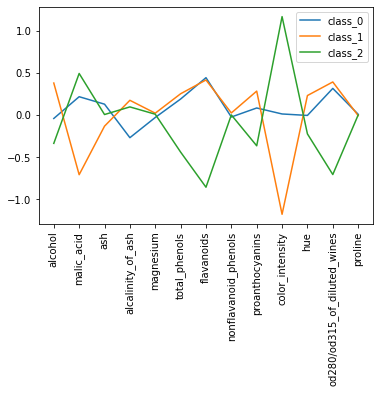

In [3]:
clf = LogisticRegression(C = 1)
clf.fit(X, y)
x = list(range(13))
plt.plot(x, clf.coef_[0], label=data['target_names'][0])
plt.plot(x, clf.coef_[1], label=data['target_names'][1])
plt.plot(x, clf.coef_[2], label=data['target_names'][2])
plt.legend()
plt.xticks(x, data['feature_names'], rotation ='vertical')
plt.show()

# Task 1 - Answer the following questions

Given the plot above, give a brief answer (a few sentences to a paragraph) to each of the following questions.

* Which feature is most important for determining if a sample is class 0?
* Which feature is most important for determining if a sample is class 2?
* If malic_acid is a large number, does that make it more or less likely that the instance belongs to class 1?  Why?
* Which two classes are probably the hardest to tell apart?  Why?
* If you could only keep two features, which ones would you keep to maximize classification accuracy?  Why those two?

# Task 2 - Answer the following questions

<ul>
<li>It is the case that the standard logistic regression algorithm, if run for many
iterations on a linearly separable dataset, finds a weight vector that separates the instances and
then keeps increasing the magnitude of the weight vector.  In fact, the magnitude of the weight vector will tend to infinity.  Explain why
the weight vector keeps increasing even after the instances are
classified correctly.  <b>Hint:</b> Consider the objective function that the algorithm is maximizing.
</li>
    <li>Explain why this behavior is undesirable.</li>
<li>Ridge regression is a method that includes a term of the following form in the objective function: $$\lambda \sum_i^m w_i^2$$
That term is the sum of the squared weights in the weight vector, where the sum is multiplied by a number between 0 and 1 to control its impact on the learning algorithm.  Describe how you would include this term in the logistic regression objective function to control the growth of weights (as mentioned in the previous questions).  Write down what the new update rule will look like for gradient ascent.  <b>Note:</b> You do not need to rederive the update rule shown in the lecture notes.  Just add whatever is need to account for the inclusion of the term above in the objective.
</li>    
</ul>